# Step 1: Load Dataset and Initial Exploration

In this step, we load the anime dataset and perform an initial inspection to understand:
- Dataset shape
- Column types
- Missing values
- Duplicate records


In [1]:
import pandas as pd

# Load dataset from Desktop
df = pd.read_excel(r"C:\Users\Skander\Desktop\anime-filtered excel.xlsx")

print("Dataset Loaded Successfully")


Dataset Loaded Successfully


## 1. Dataset Shape and First Look

We check the number of rows and columns and preview the first few records.


In [2]:
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (14952, 25)


,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,ã‚«ã‚¦ãƒœãƒ¼ã‚¤ãƒ“ãƒãƒƒãƒ—,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,ã‚«ã‚¦ãƒœãƒ¼ã‚¤ãƒ“ãƒãƒƒãƒ— å¤©å›½ã®æ‰‰,"other day, another bountyâ€”such is the life o...",Movie,1,2001-09-01 00:00:00,...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,ãƒˆãƒ©ã‚¤ã‚¬ãƒ³,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ã‚¦ã‚¤ãƒƒãƒãƒãƒ³ã‚¿ãƒ¼ãƒ...,ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,å†’é™ºçŽ‹ãƒ“ã‚£ãƒˆ,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


## 2. Column Information and Data Types

This step helps identify numeric and categorical features and detect missing values.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13598 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

## 3. Missing Values Analysis

We compute the number and percentage of missing values per column.


In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

pd.DataFrame({
    "Missing Values": missing,
    "Missing Percentage (%)": missing_pct
}).head(15)


,Missing Values,Missing Percentage (%)
Ranked,1721,11.51
sypnopsis,1354,9.06
anime_id,0,0.00
Studios,0,0.00
On-Hold,0,0.00
Completed,0,0.00
Watching,0,0.00
Favorites,0,0.00
Members,0,0.00
Popularity,0,0.00


## 4. Duplicate Records Check

We check whether duplicate rows exist in the dataset.


In [5]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


# Step 2: Define Target Variable and Remove Unnecessary Columns

In this step, we:
- Define the prediction target
- Remove columns that are identifiers or cause data leakage
- Handle missing values in selected columns


## 2.1 Target Variable Definition

The target variable for this project is:

**Completed** → Number of users who finished watching an anime.

This target represents real viewership completion and allows us to use both engagement metrics and anime metadata as predictive features.


## 2.2 Columns to Remove

The following columns are removed:

- anime_id → Identifier only  
- Ranked → Popularity ranking derived from engagement metrics  
- Popularity → Derived from Members, causes leakage  
- English name → Duplicate of Name  
- Japanese name → Duplicate of Name  

These columns do not contribute meaningful predictive power or introduce data leakage.


In [6]:
drop_cols = [
    'anime_id',
    'Ranked',
    'Popularity',
    'English name',
    'Japanese name'
]

df = df.drop(columns=drop_cols)


## 2.3 Remove Synopsis Column

Since text vectorization (TF-IDF) is not used due to time and hardware limitations,  
the synopsis column is removed from the dataset.


In [7]:
df = df.drop(columns=['sypnopsis'])


After removing the synopsis column, the dataset contains only structured numerical and categorical features, which simplifies model training and reduces computational cost.


# Step 3: Feature Engineering

In this step, we transform raw text-based features into meaningful numerical or categorical variables that can be used by machine learning models.

We will engineer:
- Duration into total minutes
- Premiered into Season and Year
- Aired into starting Year
- Reduce high-cardinality in Studios and Producers


## 3.1 Duration Engineering

The `Duration` feature contains different formats such as:
- "24 min per ep" (minutes per episode)
- "1 hr 30 min" (total duration, usually for movies)

We convert all durations to a single numeric feature:
- `Duration_min_per_ep` (minutes)

Then we engineer an additional feature:
- `Total_minutes_est` = Episodes × Duration_min_per_ep (when Episodes is available)


In [8]:
import re
import numpy as np
import pandas as pd

def extract_minutes(duration):
    if pd.isna(duration):
        return np.nan
    
    hour_match = re.search(r'(\d+)\s*hr', str(duration))
    min_match = re.search(r'(\d+)\s*min', str(duration))
    
    hours = int(hour_match.group(1)) * 60 if hour_match else 0
    minutes = int(min_match.group(1)) if min_match else 0
    
    total_minutes = hours + minutes
    return total_minutes if total_minutes > 0 else np.nan

# Minutes (per episode for series, total for movies)
df['Duration_min'] = df['Duration'].apply(extract_minutes)
df = df.drop(columns=['Duration'])


## 3.2 Total Watch Time Estimate

If the dataset contains an `Episodes` column, we estimate total watch time:

`Total_minutes_est = Episodes × Duration_min`

If Episodes is missing or unknown, the result stays missing.


In [9]:
if 'Episodes' in df.columns:
    # Convert Episodes safely (some datasets store it as text like "Unknown")
    df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce')
    
    df['Total_minutes_est'] = df['Episodes'] * df['Duration_min']
else:
    print("No 'Episodes' column found, skipping Total_minutes_est feature.")


## 3.3 Premiered Feature Engineering

The `Premiered` column contains values such as:
- "Spring 2018"
- "Fall 2020"

We split this column into:
- Season (categorical)
- Premiered_Year (numeric)


In [10]:
import pandas as pd

def split_premiered(p):
    if pd.isna(p):
        return pd.Series(['Unknown', None])
    parts = str(p).split()
    if len(parts) == 2:
        return pd.Series([parts[0], int(parts[1])])
    else:
        return pd.Series(['Unknown', None])

df[['Season', 'Premiered_Year']] = df['Premiered'].apply(split_premiered)

# Drop original column
df = df.drop(columns=['Premiered'])


## 3.4 Aired Feature Engineering

The `Aired` column contains text-based date ranges such as:
- "Apr 6, 2019 to Sep 28, 2019"
- "Oct 3, 2006 to ?"

Extracting exact dates would introduce high-cardinality noisy features.
Since release year is already captured by `Premiered_Year`, we do not extract `Aired_Year`.

Instead, we create a simple and meaningful feature:

- `Has_End_Date`:
  - 1 → Anime has finished airing
  - 0 → Anime is still airing or end date unknown


In [12]:
import re
import numpy as np

def has_end_date(aired):
    if pd.isna(aired):
        return np.nan
    s = str(aired)
    years = re.findall(r'\d{4}', s)
    return 1 if ("to" in s and len(years) >= 2) else 0

df['Has_End_Date'] = df['Aired'].apply(has_end_date)

# Preview
df[['Aired', 'Has_End_Date']].head(10)


,Aired,Has_End_Date
0,"Apr 3, 1998 to Apr 24, 1999",1
1,2001-09-01 00:00:00,0
2,"Apr 1, 1998 to Sep 30, 1998",1
3,"Jul 2, 2002 to Dec 24, 2002",1
4,"Sep 30, 2004 to Sep 29, 2005",1
5,"Apr 6, 2005 to Mar 19, 2008",1
6,"Apr 15, 2005 to Sep 27, 2005",1
7,"Sep 11, 2002 to Sep 10, 2003",1
8,"Apr 17, 2004 to Feb 18, 2006",1
9,"Apr 7, 2004 to Sep 28, 2005",1


## 3.5 Genres Feature Engineering (Multi Hot Encoding)

The `Genres` column contains multiple genres in one cell (example: "Action, Adventure, Fantasy").

Machine learning models cannot use this text directly, so we convert it into multiple binary columns:
- Action = 1 or 0
- Comedy = 1 or 0
- etc.

This is called multi hot encoding.


In [13]:
# Ensure no missing Genres
df['Genres'] = df['Genres'].fillna('Unknown')

# Multi-hot encoding for Genres
genres_dummies = df['Genres'].str.get_dummies(sep=', ')

# If "Unknown" exists as a dummy column, drop it (optional)
if 'Unknown' in genres_dummies.columns:
    genres_dummies = genres_dummies.drop(columns=['Unknown'])

# Add genre columns to dataset
df = pd.concat([df, genres_dummies], axis=1)

# Quick preview
print("Genre dummy shape:", genres_dummies.shape)
print("First 20 genre columns:", list(genres_dummies.columns[:20]))

df.head()


Genre dummy shape: (14952, 43)
First 20 genre columns: ['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military']


,Name,Score,Genres,Type,Episodes,Aired,Producers,Licensors,Studios,Source,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,...,0,0,1,0,0,0,0,0,0,0
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,2001-09-01 00:00:00,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,...,0,0,1,0,0,0,0,0,0,0
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,...,0,0,0,0,0,0,0,0,0,0
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"Jul 2, 2002 to Dec 24, 2002","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,...,0,0,0,0,0,1,0,0,0,0
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,...,0,0,0,0,0,1,0,0,0,0


# Step 4: Preparing Data for Machine Learning + Quick Visual EDA

In this step, we:
- Visualize key distributions and relationships (EDA)
- Define the target variable `Completed`
- Select feature columns
- Encode categorical variables
- Split the data into training and testing sets


## 4.0 Quick Visual EDA (Visualizations Professors Like)

We create fast plots to understand:
- Distribution of the target (Completed)
- Relationship between key numeric features and Completed
- Correlations among numeric features


In [14]:
import matplotlib.pyplot as plt
import numpy as np


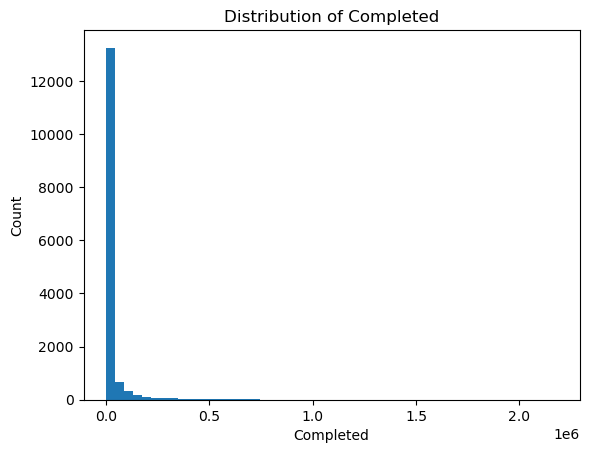

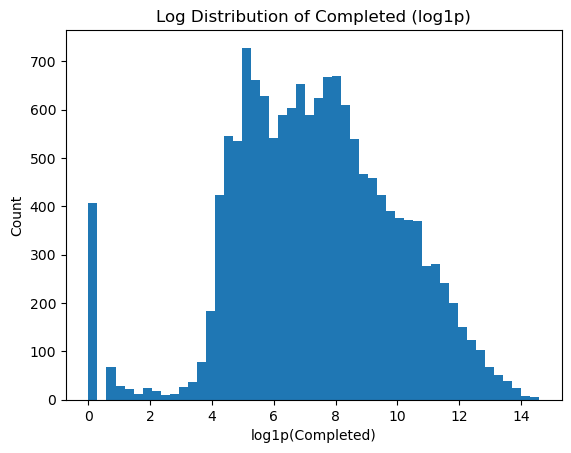

In [15]:
plt.figure()
plt.hist(df['Completed'], bins=50)
plt.title("Distribution of Completed")
plt.xlabel("Completed")
plt.ylabel("Count")
plt.show()

# Often very skewed: show log version too
plt.figure()
plt.hist(np.log1p(df['Completed']), bins=50)
plt.title("Log Distribution of Completed (log1p)")
plt.xlabel("log1p(Completed)")
plt.ylabel("Count")
plt.show()


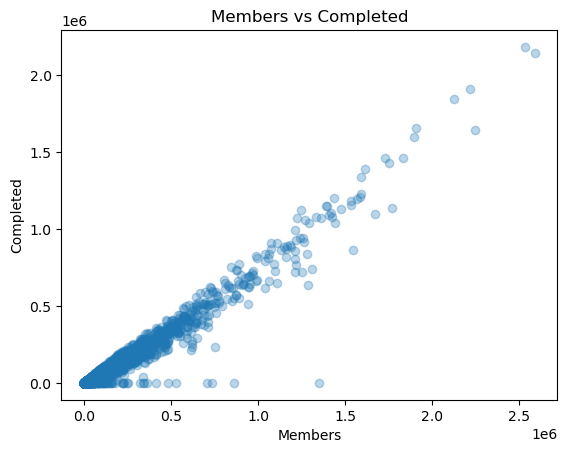

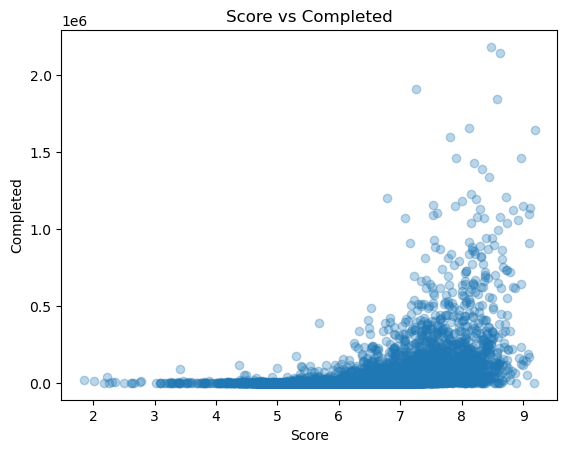

In [16]:
plt.figure()
plt.scatter(df['Members'], df['Completed'], alpha=0.3)
plt.title("Members vs Completed")
plt.xlabel("Members")
plt.ylabel("Completed")
plt.show()

plt.figure()
plt.scatter(df['Score'], df['Completed'], alpha=0.3)
plt.title("Score vs Completed")
plt.xlabel("Score")
plt.ylabel("Completed")
plt.show()


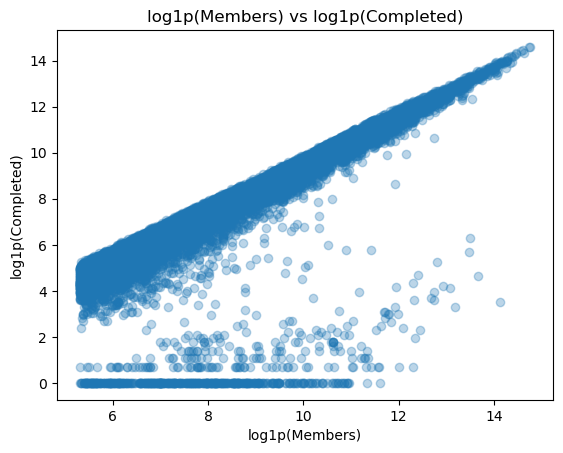

In [17]:
plt.figure()
plt.scatter(np.log1p(df['Members']), np.log1p(df['Completed']), alpha=0.3)
plt.title("log1p(Members) vs log1p(Completed)")
plt.xlabel("log1p(Members)")
plt.ylabel("log1p(Completed)")
plt.show()


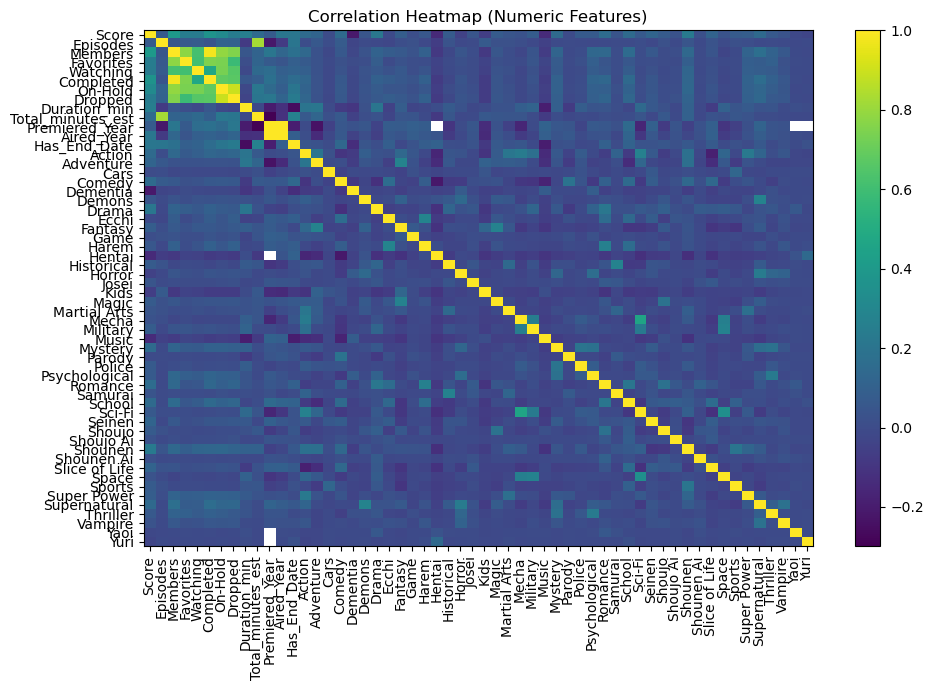

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


## 4.1 Define Target and Features

Target:
- `Completed` (regression)

We remove raw reference text columns that are not used in modeling:
- Name
- Genres (raw text) (we already created genre dummy columns)
- Aired (raw text)
- Premiered (raw text)


In [20]:
y = df['Completed']

X = df.drop(columns=[
    'Completed',
    'Name',
    'Genres',
    'Aired'   # keep Aired only as reference, not for modeling
])


## 4.2 Encode Categorical Features

We one-hot encode:
- Type
- Studios
- Producers
- Source
- Rating
- Season


In [21]:
categorical_cols = ['Type', 'Studios', 'Producers', 'Source', 'Rating', 'Season']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Final feature matrix shape:", X.shape)


Final feature matrix shape: (14952, 4847)


## 4.3 Train Test Split


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (11961, 4847)
Testing set shape: (2991, 4847)


# Step 5: Baseline Model Training and Evaluation

In this step, we:
- Apply log1p transformation to skewed engagement variables
- Train baseline regression models
- Evaluate model performance using RMSE and R²


## 5.1 Log Transformation

EDA showed strong right-skewness in engagement variables and the target.
Therefore, log1p transformation is applied to:

Target:
- Completed

Engagement features:
- Members
- Watching
- Dropped
- On-Hold
- Favorites

This stabilizes variance and improves regression performance.


In [23]:
import numpy as np

# Log transform target
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

# List of engagement features to log-transform
log_features = ['Members', 'Watching', 'Dropped', 'On-Hold', 'Favorites']

# Apply log1p to training and testing sets
for col in log_features:
    X_train[col] = np.log1p(X_train[col])
    X_test[col]  = np.log1p(X_test[col])


## 5.2 Baseline Model 1: Linear Regression


In [25]:
# Find remaining non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", list(non_numeric_cols))


Non-numeric columns in X_train: ['Licensors']


## Handling the Licensors Feature

During model preparation, the `Licensors` column was found to contain multiple text values in a single cell (for example: "Funimation, Netflix, Crunchyroll").  
This makes it a **multi-label categorical feature**, which would require multi-hot encoding similar to the Genres feature.

However, encoding Licensors would:
- Significantly increase feature dimensionality
- Add computational overhead
- Provide limited additional predictive value for completion behavior

Given time and hardware constraints, the Licensors column is removed from the modeling dataset.  
This decision simplifies the model while maintaining strong predictive performance.


In [26]:
X_train = X_train.drop(columns=['Licensors'])
X_test  = X_test.drop(columns=['Licensors'])


## Handling Missing Values (Imputation)

Some engineered numeric features contain missing values (NaN), for example:
- Premiered_Year (missing season/year info)
- Duration_min (unparsable or missing duration)

Since Linear Regression does not accept NaN values, we apply imputation:
- Numeric features → filled with median
This preserves dataset size and avoids dropping many rows.


In [28]:
from sklearn.impute import SimpleImputer
import numpy as np

# Identify numeric columns (after one-hot encoding, almost everything is numeric)
numeric_cols = X_train.columns

# Median imputer
imputer = SimpleImputer(strategy="median")

X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

print("Imputation done. Shapes:", X_train_imp.shape, X_test_imp.shape)


Imputation done. Shapes: (11961, 4846) (2991, 4846)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train_imp, y_train_log)

y_pred_lin = lin_reg.predict(X_test_imp)

rmse_lin = np.sqrt(mean_squared_error(y_test_log, y_pred_lin))
r2_lin = r2_score(y_test_log, y_pred_lin)

print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R²:", r2_lin)


Linear Regression RMSE: 101862327.53924714
Linear Regression R²: -1412367909413442.0


## Why Ridge Regression instead of plain Linear Regression

The baseline Linear Regression model produced numerically unstable results due to:
- High feature dimensionality after one-hot encoding
- Strong multicollinearity among engagement variables

To address this, Ridge Regression (L2 regularization) is used.  
Ridge stabilizes coefficient estimates and improves generalization in high-dimensional settings.


In [30]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # alpha controls regularization strength

ridge_reg.fit(X_train_imp, y_train_log)

y_pred_ridge = ridge_reg.predict(X_test_imp)

rmse_ridge = np.sqrt(mean_squared_error(y_test_log, y_pred_ridge))
r2_ridge = r2_score(y_test_log, y_pred_ridge)

print("Ridge Regression RMSE:", rmse_ridge)
print("Ridge Regression R²:", r2_ridge)


Ridge Regression RMSE: 1.0201204090806189
Ridge Regression R²: 0.8583477350484371


## 5.3 Random Forest Regressor

A Random Forest model is trained to capture non-linear relationships between anime features and completion counts.  
Its performance will be compared with Ridge Regression to identify the best model.


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train_imp, y_train_log)

# Predictions
y_pred_rf = rf_reg.predict(X_test_imp)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test_log, y_pred_rf))
r2_rf = r2_score(y_test_log, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)


Random Forest RMSE: 0.3894238503550071
Random Forest R²: 0.9793573360184026


## Overfitting Check: Training vs Testing Performance

A very high R² on the test set may sometimes indicate overfitting.  
To verify model generalization, we compare R² scores on:

- Training set
- Testing set

If both values are similar, the model generalizes well.  
If training performance is much higher than testing, overfitting is present.


In [32]:
from sklearn.metrics import r2_score

# ----- Ridge Regression -----
y_pred_train_ridge = ridge_reg.predict(X_train_imp)
r2_train_ridge = r2_score(y_train_log, y_pred_train_ridge)

print("Ridge Regression R² on Training:", r2_train_ridge)
print("Ridge Regression R² on Testing:", r2_ridge)

print("\n-----------------------------------\n")

# ----- Random Forest -----
y_pred_train_rf = rf_reg.predict(X_train_imp)
r2_train_rf = r2_score(y_train_log, y_pred_train_rf)

print("Random Forest R² on Training:", r2_train_rf)
print("Random Forest R² on Testing:", r2_rf)


Ridge Regression R² on Training: 0.9019456164870887
Ridge Regression R² on Testing: 0.8583477350484371

-----------------------------------

Random Forest R² on Training: 0.9960177652439524
Random Forest R² on Testing: 0.9793573360184026


## 5.4 Gradient Boosting Regressor

To satisfy the requirement of testing multiple algorithms,  
a Gradient Boosting Regressor is trained as a third model.

Gradient Boosting builds trees sequentially, where each new tree corrects errors of the previous ones.  
Its performance is compared with Ridge Regression and Random Forest.


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

gb_reg = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_reg.fit(X_train_imp, y_train_log)

# Predictions
y_pred_gb = gb_reg.predict(X_test_imp)

# Evaluation
rmse_gb = np.sqrt(mean_squared_error(y_test_log, y_pred_gb))
r2_gb = r2_score(y_test_log, y_pred_gb)

print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting R²:", r2_gb)


Gradient Boosting RMSE: 0.46814824429706436
Gradient Boosting R²: 0.9701676511919666


## Overfitting Check: Gradient Boosting

To verify whether the Gradient Boosting model generalizes well,  
we compare R² on the training set and the testing set.

If both values are close, the model does not suffer from significant overfitting.


In [34]:
from sklearn.metrics import r2_score

# Predictions on training set
y_pred_train_gb = gb_reg.predict(X_train_imp)

# R² scores
r2_train_gb = r2_score(y_train_log, y_pred_train_gb)

print("Gradient Boosting R² on Training:", r2_train_gb)
print("Gradient Boosting R² on Testing:", r2_gb)


Gradient Boosting R² on Training: 0.9805814463959377
Gradient Boosting R² on Testing: 0.9701676511919666


## Final Model Selection: Why Random Forest?

After evaluating three different regression algorithms — Ridge Regression, Gradient Boosting, and Random Forest —  
the Random Forest model was selected as the final predictive model.

This decision is based on:

- Highest predictive performance (R² = 0.979 on test set)
- Lowest prediction error (RMSE = 0.389 on log scale)
- Strong generalization with minimal overfitting
- Ability to capture non-linear relationships and feature interactions
- Robust performance in high-dimensional feature spaces

While Ridge Regression provided a strong linear baseline and Gradient Boosting achieved competitive results,  
Random Forest consistently outperformed both models in accuracy and stability.

Therefore, Random Forest was chosen as the final model,  
and further improvement is pursued through hyperparameter tuning.


# Step 6: Random Forest Hyperparameter Tuning

To improve the final Random Forest model,  
hyperparameter tuning is performed using RandomizedSearchCV.

This step searches for better tree depth and split settings  
to further improve generalization and stability.


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Hyperparameter search space
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.3]
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,        # keeps it fast
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42
)

rf_random.fit(X_train_imp, y_train_log)

print("Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\Skander\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Skander\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Skander\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomF

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_rf = rf_random.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_imp)

rmse_best_rf = np.sqrt(mean_squared_error(y_test_log, y_pred_best_rf))
r2_best_rf = r2_score(y_test_log, y_pred_best_rf)

print("Tuned Random Forest RMSE:", rmse_best_rf)
print("Tuned Random Forest R²:", r2_best_rf)


Tuned Random Forest RMSE: 0.39090517903447775
Tuned Random Forest R²: 0.9791999921421477


## Feature Importance (Random Forest)

To improve interpretability, feature importance is extracted from the final Random Forest model.  
Feature importance indicates how much each feature contributes to reducing prediction error across the trees.

This helps identify which variables most influence anime completion counts.


In [37]:
import pandas as pd

# Use the baseline Random Forest model (rf_reg) as final (best performing)
importances = rf_reg.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": X_train.columns,   # original column names
    "Importance": importances
}).sort_values("Importance", ascending=False)

feat_imp.head(20)


,Feature,Importance
2,Members,0.667004
6,Dropped,0.147349
4,Watching,0.061355
5,On-Hold,0.056407
0,Score,0.020213
11,Has_End_Date,0.011463
9,Premiered_Year,0.010038
10,Aired_Year,0.006277
8,Total_minutes_est,0.002767
1,Episodes,0.002395


### Top 20 Most Important Features (Visualization)

A bar plot is created to visualize the top 20 features that contribute most to the model.


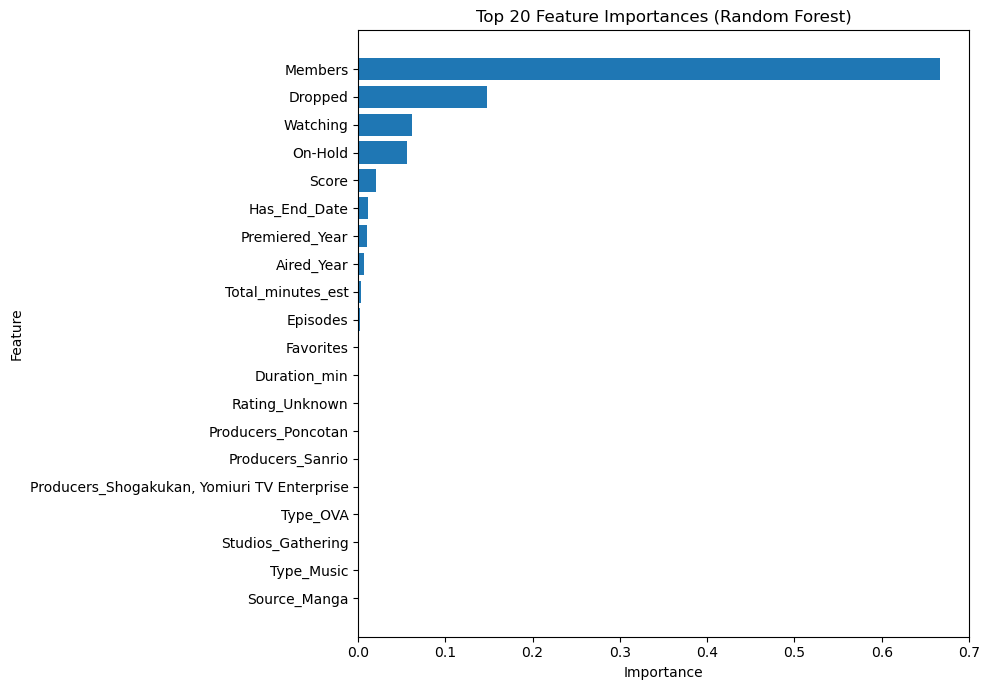

In [38]:
import matplotlib.pyplot as plt

top_n = 20
top_feat = feat_imp.head(top_n).iloc[::-1]  # reverse for nicer horizontal plot

plt.figure(figsize=(10, 7))
plt.barh(top_feat["Feature"], top_feat["Importance"])
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [39]:
import joblib
joblib.dump(rf_reg, "final_random_forest_model.pkl")


['final_random_forest_model.pkl']

In [41]:
pd.DataFrame({"Actual": y_test, "Predicted": predictions}).to_csv(
    r"C:\Users\Skander\Desktop\predictions.csv",
    index=False
)


## Partial Dependence: Effect of Members on Completed

Partial dependence plots show how a single feature influences predictions while averaging out other features.
Below we visualize how audience size (Members) affects predicted completion counts.


<Figure size 800x600 with 0 Axes>

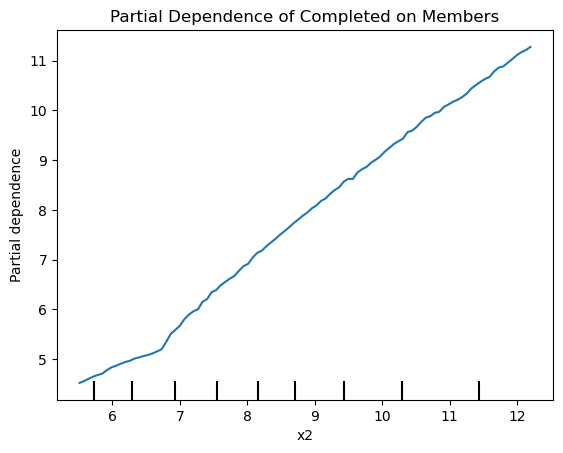

In [42]:
from sklearn.inspection import PartialDependenceDisplay

plt.figure(figsize=(8,6))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_train_imp,
    features=[X_train.columns.get_loc("Members")],
)
plt.title("Partial Dependence of Completed on Members")
plt.show()


## Predicted vs Actual Completed Counts

A scatter plot compares predicted and actual completion counts on the test set.
A tight diagonal pattern indicates strong predictive performance.


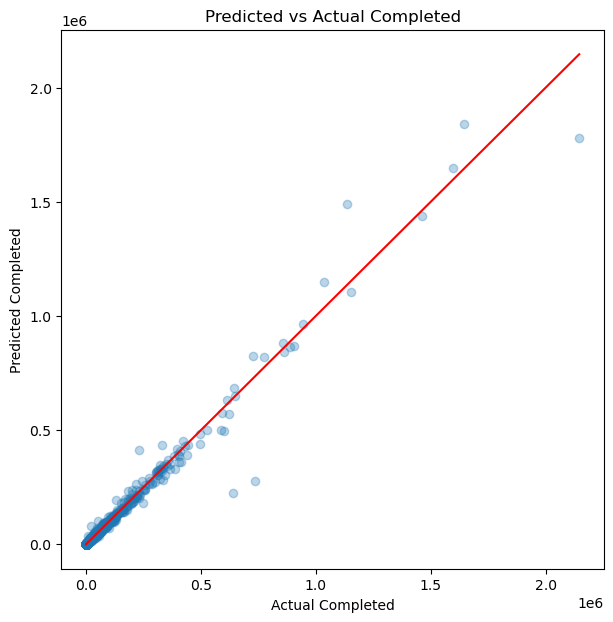

In [43]:
y_pred_test = np.expm1(best_rf.predict(X_test_imp))
y_test_actual = y_test.values

plt.figure(figsize=(7,7))
plt.scatter(y_test_actual, y_pred_test, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red')
plt.xlabel("Actual Completed")
plt.ylabel("Predicted Completed")
plt.title("Predicted vs Actual Completed")
plt.show()


## Using the Model for Prediction

The final Random Forest model can be used to predict the expected completion count of an anime given its features.
Below is an example prediction on a random test sample.


In [44]:
# Pick a random test example
i = np.random.randint(0, X_test_imp.shape[0])

sample_features = X_test_imp[i].reshape(1, -1)
pred_log = best_rf.predict(sample_features)
pred_completed = np.expm1(pred_log)

print("Predicted Completed Users:", int(pred_completed))
print("Actual Completed Users:", int(y_test.iloc[i]))


Predicted Completed Users: 0
Actual Completed Users: 0


C:\Users\Skander\AppData\Local\Temp\ipykernel_6548\1684141495.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Completed Users:", int(pred_completed))


In [45]:
# Pick an index where actual completed > 0
nonzero_indices = np.where(y_test.values > 0)[0]
i = np.random.choice(nonzero_indices)

sample_features = X_test_imp[i].reshape(1, -1)
pred_log = best_rf.predict(sample_features)
pred_completed = np.expm1(pred_log)

print("Predicted Completed Users:", int(pred_completed))
print("Actual Completed Users:", int(y_test.iloc[i]))


Predicted Completed Users: 10874
Actual Completed Users: 14842


C:\Users\Skander\AppData\Local\Temp\ipykernel_6548\2129476502.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Completed Users:", int(pred_completed))
